In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier

In [2]:
data_set = pd.read_csv("mbti_1.csv")
data_set.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [3]:
data_set.isnull().any()

type     False
posts    False
dtype: bool

In [4]:
data_set.shape

(8675, 2)

In [5]:
data_set.iloc[0,1].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [6]:
len(data_set.iloc[1,1].split('|||'))

50

In [7]:
types = np.unique(np.array(data_set['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [8]:
total = data_set.groupby(['type']).count()*50
total

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


In [9]:
all_posts= pd.DataFrame()
for j in types:
    temp1 = data_set[data_set['type']==j]['posts']
    temp2 = []
    for i in temp1:
        temp2+=i.split('|||')
    temp3 = pd.Series(temp2)
    all_posts[j] = temp3

In [10]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def build_bag_of_words_features_filtered(words):
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

In [11]:
build_bag_of_words_features_filtered(all_posts['INTJ'].iloc[1])

{'Alpha': 1,
 'Dear': 1,
 'ENTJ': 1,
 'Long': 1,
 'Sincerely': 1,
 'see': 1,
 'sub': 1,
 'time': 1}

In [12]:
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'extrovert') \
        for i in temp1]]

In [13]:
split=[]
for i in range(16):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [14]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [16]:
IntroExtro = NaiveBayesClassifier.train(train)
import pickle
f = open('IntroExtronew.pickle', 'wb')
pickle.dump(IntroExtro, f,protocol=2)
f.close()


In [17]:
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]


In [18]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [19]:
JudgingPercieiving = NaiveBayesClassifier.train(train)
f = open('JudgingPercieivingnew.pickle', 'wb')
pickle.dump(JudgingPercieiving, f,protocol=2)
f.close()

In [20]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]

In [21]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [22]:
IntuitionSensing = NaiveBayesClassifier.train(train)
f = open('IntuitionSensingnew.pickle', 'wb')
pickle.dump(IntuitionSensing, f,protocol=2)
f.close()


In [23]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

In [24]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [25]:
ThinkingFeeling = NaiveBayesClassifier.train(train)
f = open('ThinkingFeelingnew.pickle', 'wb')
pickle.dump(ThinkingFeeling, f,protocol=2)
f.close()

In [55]:
def MBTI(input):
    tokenize = build_bag_of_words_features_filtered(input)

    
    ie = IntroExtro.classify(tokenize)
    Is = IntuitionSensing.classify(tokenize)
    tf = ThinkingFeeling.classify(tokenize)
    jp = JudgingPercieiving.classify(tokenize)
    
    mbt = ''
    
    if(ie == 'introvert'):
        mbt+='I'
    if(ie == 'extrovert'):
        mbt+='E'
    if(Is == 'Intuition'):
        mbt+='N'
    if(Is == 'Sensing'):
        mbt+='S'
    if(tf == 'Thinking'):
        mbt+='T'
    if(tf == 'Feeling'):
        mbt+='F'
    if(jp == 'Judging'):
        mbt+='J'
    if(jp == 'Percieving'):
        mbt+='P'
    return(mbt)

In [56]:
def tellmemyMBTI(input, name, traasits=[]):
    a = []
    trait1 = pd.DataFrame([0,0,0,0],['I','N','T','J'],['count'])
    trait2 = pd.DataFrame([0,0,0,0],['E','S','F','P'],['count'])
    for i in input:
        a += [MBTI(i)]
    for i in a:
        for j in ['I','N','T','J']:
            if(j in i):
                trait1.loc[j]+=1                
        for j in ['E','S','F','P']:
            if(j in i):
                trait2.loc[j]+=1 
    trait1 = trait1.T
    trait1 = trait1*100/len(input)
    trait2 = trait2.T
    trait2 = trait2*100/len(input)
    
    
    #Finding the personality
    YourTrait = ''
    for i,j in zip(trait1,trait2):
        temp = max(trait1[i][0],trait2[j][0])
        if(trait1[i][0]==temp):
            YourTrait += i  
        if(trait2[j][0]==temp):
            YourTrait += j
    traasits +=[YourTrait] 
    
    #Plotting
    
    labels = np.array(results.columns)

    intj = trait1.loc['count']
    ind = np.arange(4)
    width = 0.4
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, intj, width, color='royalblue')

    esfp = trait2.loc['count']
    rects2 = ax.bar(ind+width, esfp, width, color='seagreen')

    fig.set_size_inches(10, 7)
    
    

    ax.set_xlabel('Finding the MBTI Trait', size = 18)
    ax.set_ylabel('Trait Percent (%)', size = 18)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0,105, step= 10))
    ax.set_title('Your Personality is '+YourTrait,size = 20)
    plt.grid(True)
    
    
    fig.savefig(name+'.png', dpi=200)
    
    plt.show()
    return(traasits)
        

In [57]:
with open("Myquora.txt", 'rb') as f:
     my_writing = [l.decode('utf8', 'ignore') for l in f.readlines()]


In [58]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

38

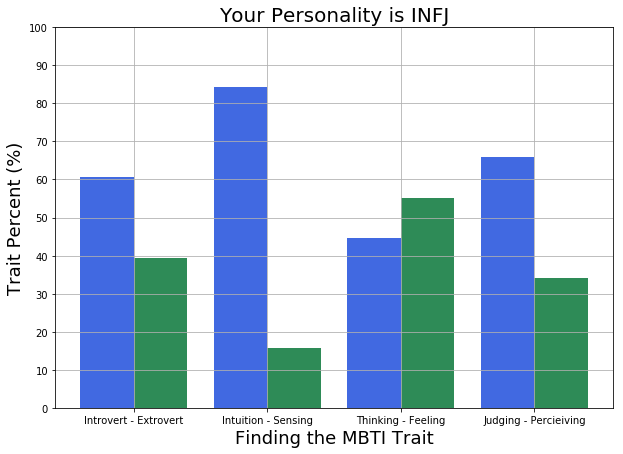

In [64]:
temp = {'train' : [81.12443979837917,70.14524215640667,80.03456948570128,79.79341109742592], 'test' : [58.20469312585358,54.46262259027357,59.41315234035509,54.40549600629061]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
trait=tellmemyMBTI(my_posts, 'Divy')
